# Loading children's speech data

In [328]:
import pandas as pd

data = pd.read_pickle('./asr_data/childrens_speech')
data

,text,audio,file_name
0,three,"[0.009646121, 0.021695968, 0.022539534, 0.0212...",english_children/english_words_sentences/11_M_...
1,ten,"[0.027527185, 0.032552492, 0.012983527, 0.0112...",english_children/english_words_sentences/11_M_...
2,nine,"[-0.03888016, -0.057698667, -0.045864653, -0.0...",english_children/english_words_sentences/11_M_...
3,four,"[0.04435131, 0.06784426, 0.058827527, 0.077713...",english_children/english_words_sentences/11_M_...
4,five,"[0.025824236, 0.029695712, 0.02606499, 0.03642...",english_children/english_words_sentences/11_M_...
...,...,...,...
634,and then they saw two frogs,"[-0.025713801, -0.044510987, -0.041728463, -0....",english_children/english_free_speech/files_cut...
635,but one frog didn't came up,"[0.010593225, 0.016391743, 0.012017116, 0.0188...",english_children/english_free_speech/files_cut...
636,and then they saw little baby frogs,"[0.015749954, 0.023017816, 0.018736875, 0.0202...",english_children/english_free_speech/files_cut...
637,and then all of the frogs was looking,"[-0.050608773, -0.07725125, -0.06856466, -0.07...",english_children/english_free_speech/files_cut...


In [329]:
import whisper
model = whisper.load_model('tiny')

for i, audio in enumerate(data[data['file_name'].str.contains('number')]['audio']):
    print(i, model.transcribe(audio, language='english', beam_size=3)['text'])

0  three
1  10
2  Nine
3  And技
4  Bye!
5  Two
6  6
7  8
8  Seven
9  One
10  Thank you.
11  Line
12  three
13  10
14  8
15  Two
16  6
17  Bye!
18  wherever you go you know where you guys are right now today. no, thank you. and when I'm like a Bentoner everything doesn't have it. when you're not, you just use a answer to the題, but it's recorded. First time you're watching Boo Piek deviation. bot a
19 akh
20  см
21  8
22  Good
23  6
24  free
25  4
26  10
27  Peace!
28  so
29  8
30  hell
31  are warm
32  Five
33  Next
34  Two
35  free
36  6
37  Okay, that's time for the stuff.
38  Free
39  You're good!
40  take care.
41  Yeah.
42  Spine
43  t
44  fall
45  and took a
46  glowing
47  A
48  Thanks for watching.
49  one
50 
51  five
52  His head.
53  9
54  Check!
55  What the f are you saying, Beth?
56  Gen 2 Seven
57  A
58  one
59  imagine that it's an almost 3-year-old how to go back to front or back, without playing the tune.
60  5


KeyboardInterrupt: 

# Loading transcribed data

The models used here are Whisper (tiny, base, and small) and lthe 960h Large wav2vec2

In [366]:

whisper_tiny = pd.read_pickle('./asr_data/tiny_whisper')
whisper_tiny['model'] = 'whisper_tiny'

whisper_base = pd.read_pickle('./asr_data/base_whisper')
whisper_base['model'] = 'whisper_base'

whisper_small = pd.read_pickle('./asr_data/small_whisper')
whisper_small['model'] = 'whisper_small'

wav2vec2_large_960h = pd.read_pickle('./asr_data/wav2vec_large_960h')
wav2vec2_large_960h['model'] = 'wav2vec2_large_960h'

# From one data frame with all models 
all_models = pd.concat([whisper_tiny, whisper_base, whisper_small, wav2vec2_large_960h], axis=0, ignore_index=True)


# Convert Arabic numbers such as "1" to words one, i.e "one"

In [331]:
num2words = {'1': 'one', '2': 'two', '3': 'three', '4': 'four', '5': 'five',
             '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine', '10': 'ten'}

strings = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
def n2w(n):
    """Convert numbers to words"""
    if n in strings:
        return n
    return num2words[n]


In [368]:
list_of_numbs = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
                 '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

for i in all_models.index:
    if 'numbers' in all_models.at[i, 'file_name'] and all_models.at[i, 'hypothesis_clean'] not in list_of_numbs:
        all_models.at[i, 'references_clean'] = all_models.at[i, 'references']
    # if 'number' in str(all_models.at[i, 'file_name']):
    #     print(all_models.at[i, 'references'])
    

    # if 'number' in row['file_name']:
    #     print(all_models.at[i , 'references'])
# all_models[all_models['file_name'].str.contains('number')]


In [369]:
all_models[all_models['file_name'].str.contains('numbers')]


,file_name,hypothesis,references,hypothesis_clean,references_clean,model
5,drive/MyDrive/data/english_children/english_wo...,Free,three,free,three,whisper_tiny
6,drive/MyDrive/data/english_children/english_wo...,ens.,two,ens,two,whisper_tiny
7,drive/MyDrive/data/english_children/english_wo...,9,nine,9,9,whisper_tiny
8,drive/MyDrive/data/english_children/english_wo...,snap,seven,snap,seven,whisper_tiny
9,drive/MyDrive/data/english_children/english_wo...,ory front.,one,ory front,one,whisper_tiny
...,...,...,...,...,...,...
2329,english_children/english_words_sentences/09_F_...,EIGHT,eight,8,8,wav2vec2_large_960h
2330,english_children/english_words_sentences/09_F_...,IX,six,ix,six,wav2vec2_large_960h
2331,english_children/english_words_sentences/09_F_...,OLY,four,oly,four,wav2vec2_large_960h
2332,english_children/english_words_sentences/09_F_...,IVES,five,ives,five,wav2vec2_large_960h


In [334]:
nmbs = whisper_tiny[whisper_tiny['file_name'].str.contains('number')][['references', 'references_clean']]
# nmbs.to_csv(r'numbs.txt', header=None,
#               index=None, sep=' ', mode='a')


# Calculating the Word Error Rates

In [370]:
import jiwer

wers = pd.DataFrame()
wers['model'] = ['whisper_tiny', 'whisper_base',
                 'whisper_small', 'wav2vec2_large_960h']

conditions = ['port', 'studio', 'nao', 'free_speech', 'words_sentence', 'number']

for i, row in enumerate(wers['model']):
    # Mixed data WERs
    subset = all_models[all_models['model'] == row]
    wers.at[i, 'mixed'] = jiwer.wer(list(subset["references_clean"]),
                                    list(subset["hypothesis_clean"]))
    for condition in conditions:
        # Calculate the WERs for all the conditions
        subset = all_models[(all_models['model'] == row ) & (all_models['file_name'].str.contains(condition))]
        if condition == 'words_sentence':
            subset = subset[~subset['file_name'].str.contains('number')]
        wers.at[i, condition] = jiwer.wer(list(subset["references_clean"]),
                                          list(subset["hypothesis_clean"]))
        
      
# print(f"WER: {wer * 100:.2f} %"
wers


,model,mixed,port,studio,nao,free_speech,words_sentence,number
0,whisper_tiny,0.514643,0.426991,0.484444,0.695291,0.507883,0.379939,1.039855
1,whisper_base,0.423824,0.411504,0.437778,0.554017,0.396959,0.306991,1.014493
2,whisper_small,0.318526,0.345133,0.335556,0.443213,0.282095,0.215805,0.920290
3,wav2vec2_large_960h,0.621586,0.539823,0.604444,0.891967,0.591779,0.583587,0.949275


# Calculating the Levenshtein distance 



In [405]:
from Levenshtein import ratio
from Levenshtein import distance
from Levenshtein import hamming
import statistics
lds = pd.DataFrame()
lds['model'] = ['whisper_tiny', 'whisper_base',
                 'whisper_small', 'wav2vec2_large_960h']

conditions = ['port', 'studio', 'nao', 'free_speech', 'words_sentence', 'number']

for i, row in enumerate(lds['model']):
    subset = all_models[all_models['model'] == row]
    ld = []
    for j, sub_row in subset.iterrows():
        ld.append(distance(sub_row["references_clean"],
                           sub_row["hypothesis_clean"]) / len(sub_row["references_clean"]))
    # Get the mean LD
    lds.at[i, 'mixed'] = round(statistics.fmean(ld),2)
 
    for condition in conditions:
        subset = all_models[(all_models['model'] == row) & (
              all_models['file_name'].str.contains(condition))]
        if condition == 'words_sentence':
            subset = subset[~subset['file_name'].str.contains('number')]
        ld = []
        for j, sub_row in subset.iterrows():
            ld.append(distance(
                sub_row["references_clean"], sub_row["hypothesis_clean"]) / len(sub_row["references_clean"]))
        lds.at[i, condition] = round(statistics.fmean(ld),2)

lds
# print(lds.to_latex(index=False))



,model,mixed,port,studio,nao,free_speech,words_sentence,number
0,whisper_tiny,0.62,0.70,0.66,0.94,0.37,0.26,1.00
1,whisper_base,0.55,0.67,0.63,0.81,0.28,0.20,0.94
2,whisper_small,0.45,0.50,0.58,0.70,0.19,0.14,0.81
3,wav2vec2_large_960h,0.52,0.50,0.57,0.78,0.36,0.34,0.74


In [337]:
data[data['file_name'].str.contains('words_sentence') & ~data['file_name'].str.contains('number')]


,text,audio,file_name
10,the horse is behind the car,"[-0.015251865, -0.023818186, -0.02329224, -0.0...",english_children/english_words_sentences/11_M_...
11,the fish is in the pond,"[-0.029316, -0.039661027, -0.035836473, -0.043...",english_children/english_words_sentences/11_M_...
12,the horse is next to the stable,"[0.012740146, 0.019189503, 0.013212437, 0.0172...",english_children/english_words_sentences/11_M_...
13,the dog is in front of the house,"[0.0037915646, 0.038624268, 0.039541908, 0.037...",english_children/english_words_sentences/11_M_...
14,the dog is on top of the shed,"[0.018596483, 0.0245001, 0.0220676, 0.02340501...",english_children/english_words_sentences/11_M_...
...,...,...,...
402,the fish is in the pond,"[-0.0030462423, -0.003133146, -0.0032962598, -...",english_children/english_words_sentences/09_F_...
403,the horse is next to the stable,"[0.0023908885, 0.0032059578, 0.0019364515, 0.0...",english_children/english_words_sentences/09_F_...
404,the dog is in front of the horse,"[0.03191845, 0.045891598, 0.039890625, 0.04322...",english_children/english_words_sentences/09_F_...
405,the dog is on top of the shed,"[-0.009046147, -0.016705312, -0.015778571, -0....",english_children/english_words_sentences/09_F_...


In [338]:
# numbers = whisper_base[whisper_base['file_name'].str.contains('number')][['hypothesis_clean',
#                          'references_clean',]]

# numbers.to_csv('./numbers.txt', index=None)


# On the robustness of the NLU

In [404]:
# from unittest import expectedFailure
import requests
# TODO: include 'negative exmaples'
# Create an empty list to store predictions with size of ASR model predcitons

nlu_performance = pd.DataFrame()
nlu_performance['model'] = ['whisper_tiny', 'whisper_base', 'whisper_small', 'wav2vec2_large_960h']
url = 'http://localhost:5005/model/parse'

list_of_numbs = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 
                 '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
                 
for i, row in enumerate(nlu_performance['model']):
    numbers = all_models[
        (all_models['model'] == row ) &
        (all_models['file_name'].str.contains('number') )
    ]
    numbers = numbers[[hypo.lower() not in list_of_numbs for hypo in numbers['hypothesis_clean']]].copy()
    # all_tests = pd.concat([numbers, not_numbers], ignore_index=True)
    # preds = [None] * (len(numbers) + len(not_numbers))
    intent_preds = [None] * (len(numbers))
    entity_preds = [None] * (len(numbers))

    for j, row in enumerate(numbers['hypothesis']):

        payload = {
            "text": row
        }
        try:
            responses = requests.post(url, json=payload).json()
          
        except Exception as e:
            print(e)
        intent_preds[j] = responses['intent']['name'] == 'math_game_count'
     
        if responses['entities']:
            # print(responses['entities'])
            entity_preds[j] = any(entity['entity'] == 'math_game_number' for entity in responses['entities'])
        else:
            entity_preds[j] = False
    # print(i)
    nlu_performance.at[i, 'inten_acc'] = round(sum(intent_preds) / len(intent_preds), 2) * 100
    nlu_performance.at[i, 'entity_acc'] = round(sum(entity_preds) / len(entity_preds),2) * 100


nlu_performance


,model,inten_acc,entity_acc
0,whisper_tiny,3.0,3.0
1,whisper_base,6.0,6.0
2,whisper_small,2.0,2.0
3,wav2vec2_large_960h,4.0,0.0


In [400]:
nlu_performance['LD'] = lds['number']
print(nlu_performance.to_latex(index=False))


181

In [342]:
numbs = whisper_tiny[whisper_tiny['file_name'].str.contains('number')][['references_clean', 'hypothesis_clean']]
numbs.to_csv('./numbers.txt', index=None)

In [343]:
print(nlu_performance.to_latex(index=False))

\begin{tabular}{lr}
\toprule
              model &   LD \\
\midrule
       whisper\_tiny & 1.30 \\
       whisper\_base & 1.23 \\
      whisper\_small & 1.11 \\
wav2vec2\_large\_960h & 0.92 \\
\bottomrule
\end{tabular}



/var/folders/2b/tdb597rj4t118s3zzjps6mk40000gn/T/ipykernel_74681/3065712906.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(nlu_performance.to_latex(index=False))


In [344]:
lds

,model,mixed,port,studio,nao,free_speech,words_sentence,number
0,whisper_tiny,0.75,0.92,0.90,1.06,0.37,0.26,1.30
1,whisper_base,0.68,0.91,0.84,0.90,0.28,0.20,1.23
2,whisper_small,0.58,0.73,0.79,0.85,0.19,0.14,1.11
3,wav2vec2_large_960h,0.60,0.65,0.71,0.84,0.36,0.34,0.92


# Plotting figures

In [345]:
from colour import Color
green = Color("green")
colors = list(green.range_to(Color("blue"),20))
colors

[<Color green>,
 <Color #00870e>,
 <Color #008d1e>,
 <Color #00942f>,
 <Color #009b41>,
 <Color #00a155>,
 <Color #00a86a>,
 <Color #00af81>,
 <Color #00b599>,
 <Color #00bcb2>,
 <Color #00b9c3>,
 <Color #00aaca>,
 <Color #0099d0>,
 <Color #0088d7>,
 <Color #0075de>,
 <Color #0060e4>,
 <Color #004aeb>,
 <Color #0033f2>,
 <Color #001af8>,
 <Color blue>]

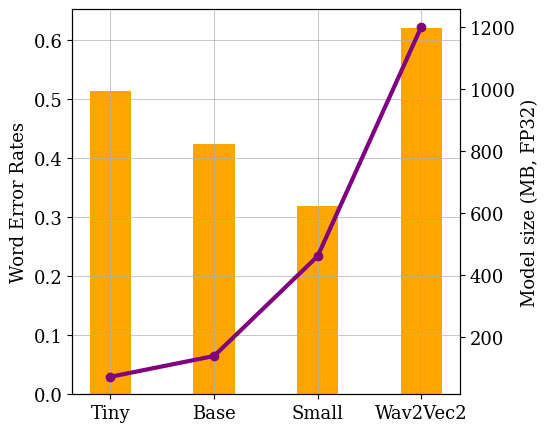

In [406]:
from pyexpat import model
import numpy as np 
import matplotlib.pyplot as plt
#
plt.rcParams.update({'font.size': 13, 'font.family': 'serif'})

X = ['Tiny', 'Base', 'Small', 'Wav2Vec2']
 
 
ld_numbers = lds['number']

model_sizes = [72, 139, 461, 1200]
fig, ax1 = plt.subplots(figsize=(5,5))

X_axis = np.arange(len(X))
ax2 = ax1.twinx()
ax2.plot(X_axis, model_sizes, '-o', color='purple', linewidth=3)
# ax1.plot(x, y1, 'g-')
# ax2.plot(x, y2, 'b-')

# ax1.set_xlabel('X data')
ax1.set_ylabel('Word Error Rates')
ax2.set_ylabel('Model size (MB, FP32)')
# ax2.set_yticks(model_sizes)
ax1.set_xticks(X_axis, X)
# ax1.set(aspect=1)




# ax1.grid(linestyle='--', linewidth=1)
ax1.bar(X_axis,  wers['mixed'], 0.4,
        label='Word level', color='orange')

plt.xlabel("Automatic Speech Recogntion Model")
# plt.ylabel("Normalised LevenShetein Distance")
# plt.title("The Tiny Whisper model's perfomance is on par with Wav2vec2's largest model.\n Both data sets include native and non-native speakers of mean age 4.9 STD = 0.3")
# ax1.legend()
ax1.grid(visible=True, linestyle='-', linewidth=0.5)
plt.show()
fig.savefig('LDS.pdf', bbox_inches='tight')


In [347]:
data[data['file_name'].str.contains('sentence' & 'number')]


TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [ ]:
st1 = "then the rat looked at the dog"
st2 =  "rat look at dogs"
distance(st1, st2) / len(


0.5161290322580645

In [ ]:
ratio("three", "free")

0.6666666666666667